In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

from bs4 import BeautifulSoup
import os

# !conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries imported.')

Libraries imported.
Solving environment: ...working... done

# All requested packages already installed.



In [111]:
CLIENT_ID = 'MNW4DNW2UJ45CPQW4ZP4YELQGFYZQHSTKQKVWI1ZIBQ30QA2' # your Foursquare ID
CLIENT_SECRET = 'CFERK4DVASW0BCFO2JONB2D2TG41CE1RZKQSEL2PR5YZDNFG' # your Foursquare Secret
VERSION = '20201127'

In [4]:
url='https://cocl.us/new_york_dataset'
resp=requests.get(url).json()
# all data is present in features label
features=resp['features']
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
# instantiate the dataframe
new_york_data = pd.DataFrame(columns=column_names)
for data in features:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    new_york_data = new_york_data.append({'Borough': borough,
                                      'Neighborhood': neighborhood_name,
                                      'Latitude': neighborhood_lat,
                                      'Longitude': neighborhood_lon}, ignore_index=True)

In [6]:
df =new_york_data

In [10]:
df.head(5)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


### Let's see how many neighborhoods are there per Borough

In [11]:
df.Borough.value_counts()

Queens           81
Brooklyn         70
Staten Island    63
Bronx            52
Manhattan        40
Name: Borough, dtype: int64

Text(0, 0.5, '# of Neighborhoods')

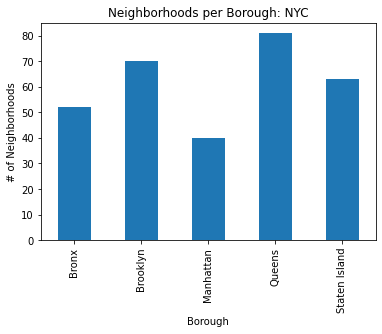

In [23]:
df.groupby('Borough')['Neighborhood'].count().plot.bar()
plt.title('Neighborhoods per Borough: NYC')
plt.xlabel('Borough')
plt.ylabel('# of Neighborhoods')

In [25]:
def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [27]:
# queens has most neighborhoods
# prepare neighborhood list that contains japanese restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
chinese_df=pd.DataFrame(columns=column_names)
count=1
for row in df.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    chinese_restaurant=venues[venues['Category']=='Chinese Restaurant']   

    for resturant_detail in chinese_restaurant.values.tolist():
        id, name , category=resturant_detail
        chinese_df = chinese_df.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

In [28]:
chinese_df

,Borough,Neighborhood,ID,Name
0,Bronx,Co-op City,4c9d5f2654c8a1cd2e71834b,Guang Hui Chinese Restaurant
1,Bronx,Eastchester,4dabc3dc93a04642f09ccabd,Xing Lung Chinese Restaurant
2,Bronx,Norwood,4e41d2c4b61ca5ba3b1f9c6b,Ming Liang Kitchen
3,Bronx,Pelham Parkway,4b9d6b45f964a52078ab36e3,Mr. Q's Chinese Restaurant
4,Bronx,Bedford Park,4e4d0387bd413c4cc66dfd72,Hung Hing Chinese Restaurant
5,Bronx,Bedford Park,4cba4a550180721ebb739961,Rose Flower Chinese
6,Bronx,Bedford Park,4d081644e554721e5423c0f8,Wai Kang Kitchen Chinese Food
7,Bronx,Fordham,4cf30a837e93f04d366a5669,China Wok II
8,Bronx,East Tremont,4ccf58277f56a1434cfec6a6,Wings Chinese Restaurant
9,Bronx,West Farms,4cd0d4d77b6854810401c4f8,Food Hai


In [30]:
chinese_df.to_csv('chinese_rest.csv')

Text(0, 0.5, '# of Chinese Restaurants')

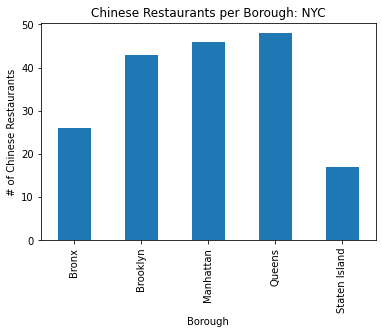

In [38]:
chinese_df.groupby('Borough')['ID'].count().plot.bar()
plt.title('Chinese Restaurants per Borough: NYC')
plt.xlabel('Borough')
plt.ylabel('# of Chinese Restaurants')

So far we can see that Queens has the most Chinese Restaurants, then Manhattan, then Brooklyn

In [73]:
asians_nyc = pd.read_csv('race_nyc.csv')

In [75]:
asians_nyc.head(10)

,Table SF1-P9 NYC: Total Asian Population by Selected Subgroups,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,"New York City and Boroughs, 2010",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Geographic Area,Total Asian Alone or In Combination With One o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NYC and Boroughs,Total Asian Alone or In Combi-nation With One ...,Total Asian Only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asian in Combi-nation with An-other Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Total Asian Only,Asian Indian,Bangla-deshi,Bhuta-nese,Bur-mese,Cam-bodian,Chinese\n and \nTai-wanese,Fili-\npino,Hmong,Indo-nesian,Japa-nese,Kore-an,Lao-tian,Malay-sian,Nepa-lese,Paki-stani,Sri Lan-kan,Thai,Viet-nam-ese,Other Asian and \nPersons of Two or More Asian...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,New York City,"1,134,919","1,038,388","192,209","53,174",345,"3,614","2,166","486,463","67,292",59,"3,785","24,277","96,741",440,"2,100","5,681","41,887","3,696","6,056","13,387","35,016","96,531",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Bronx,"59,085","49,609","15,865","7,323",74,71,"1,055","6,742","5,576",1,50,562,"2,840",99,11,129,"2,399",174,326,"3,215","3,097","9,476",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Brooklyn,"284,489","262,276","26,144","10,667",5,"1,055",613,"172,071","7,930",14,383,"3,938","6,904",82,478,355,"18,296",219,636,"3,944","8,542","22,213",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
asians_nyc.drop(axis=0, index = [0,1,2,3,5,6], inplace=True)

In [77]:
asians_nyc.columns = asians_nyc.iloc[0]
asians_nyc = asians_nyc[1:]

In [72]:
asians_nyc.drop(axis=0, index = [5, 6], inplace=True)

In [78]:
asians_nyc.set_index()

4,NaN,NaN,Total Asian Only,Asian Indian,Bangla-deshi,Bhuta-nese,Bur-mese,Cam-bodian,Chinese\n and \nTai-wanese,Fili-\npino,Hmong,Indo-nesian,Japa-nese,Kore-an,Lao-tian,Malay-sian,Nepa-lese,Paki-stani,Sri Lan-kan,Thai,Viet-nam-ese,Other Asian and \nPersons of Two or More Asian Cate-gories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,New York City,"1,134,919","1,038,388","192,209","53,174",345,"3,614","2,166","486,463","67,292",59,"3,785","24,277","96,741",440,"2,100","5,681","41,887","3,696","6,056","13,387","35,016","96,531",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Bronx,"59,085","49,609","15,865","7,323",74,71,"1,055","6,742","5,576",1,50,562,"2,840",99,11,129,"2,399",174,326,"3,215","3,097","9,476",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Brooklyn,"284,489","262,276","26,144","10,667",5,"1,055",613,"172,071","7,930",14,383,"3,938","6,904",82,478,355,"18,296",219,636,"3,944","8,542","22,213",NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Manhattan,"199,722","179,552","25,857","1,672",26,240,168,"94,877","10,399",16,470,"13,201","19,683",109,524,240,"2,482",450,"1,282","2,194","5,662","20,170",NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Queens,"552,867","511,787","117,550","33,152",240,"2,132",230,"199,469","38,163",24,"2,860","6,375","64,107",137,"1,029","4,930","16,215","1,293","3,677","3,566","16,638","41,080",NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Staten Isl,"38,756","35,164","6,793",360,0,116,100,"13,304","5,224",4,22,201,"3,207",13,58,27,"2,495","1,560",135,468,"1,077","3,592",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
asians_nyc = asians_nyc.reset_index(drop=True)

In [98]:
asians_nyc.rename(columns={0: "", 1: "Borough", 2: "Total Asian Alone or In Combi-nation With One or More Other Races"})

4,NaN,NaN,Total Asian Only,Asian Indian,Bangla-deshi,Bhuta-nese,Bur-mese,Cam-bodian,Chinese\n and \nTai-wanese,Fili-\npino,Hmong,Indo-nesian,Japa-nese,Kore-an,Lao-tian,Malay-sian,Nepa-lese,Paki-stani,Sri Lan-kan,Thai,Viet-nam-ese,Other Asian and \nPersons of Two or More Asian Cate-gories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,New York City,"1,134,919","1,038,388","192,209","53,174",345,"3,614","2,166","486,463","67,292",59,"3,785","24,277","96,741",440,"2,100","5,681","41,887","3,696","6,056","13,387","35,016","96,531",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bronx,"59,085","49,609","15,865","7,323",74,71,"1,055","6,742","5,576",1,50,562,"2,840",99,11,129,"2,399",174,326,"3,215","3,097","9,476",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brooklyn,"284,489","262,276","26,144","10,667",5,"1,055",613,"172,071","7,930",14,383,"3,938","6,904",82,478,355,"18,296",219,636,"3,944","8,542","22,213",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manhattan,"199,722","179,552","25,857","1,672",26,240,168,"94,877","10,399",16,470,"13,201","19,683",109,524,240,"2,482",450,"1,282","2,194","5,662","20,170",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Queens,"552,867","511,787","117,550","33,152",240,"2,132",230,"199,469","38,163",24,"2,860","6,375","64,107",137,"1,029","4,930","16,215","1,293","3,677","3,566","16,638","41,080",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Staten Isl,"38,756","35,164","6,793",360,0,116,100,"13,304","5,224",4,22,201,"3,207",13,58,27,"2,495","1,560",135,468,"1,077","3,592",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
asians_nyc

4,NaN,NaN,Total Asian Only,Asian Indian,Bangla-deshi,Bhuta-nese,Bur-mese,Cam-bodian,Chinese\n and \nTai-wanese,Fili-\npino,Hmong,Indo-nesian,Japa-nese,Kore-an,Lao-tian,Malay-sian,Nepa-lese,Paki-stani,Sri Lan-kan,Thai,Viet-nam-ese,Other Asian and \nPersons of Two or More Asian Cate-gories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,New York City,"1,134,919","1,038,388","192,209","53,174",345,"3,614","2,166","486,463","67,292",59,"3,785","24,277","96,741",440,"2,100","5,681","41,887","3,696","6,056","13,387","35,016","96,531",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bronx,"59,085","49,609","15,865","7,323",74,71,"1,055","6,742","5,576",1,50,562,"2,840",99,11,129,"2,399",174,326,"3,215","3,097","9,476",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brooklyn,"284,489","262,276","26,144","10,667",5,"1,055",613,"172,071","7,930",14,383,"3,938","6,904",82,478,355,"18,296",219,636,"3,944","8,542","22,213",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manhattan,"199,722","179,552","25,857","1,672",26,240,168,"94,877","10,399",16,470,"13,201","19,683",109,524,240,"2,482",450,"1,282","2,194","5,662","20,170",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Queens,"552,867","511,787","117,550","33,152",240,"2,132",230,"199,469","38,163",24,"2,860","6,375","64,107",137,"1,029","4,930","16,215","1,293","3,677","3,566","16,638","41,080",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Staten Isl,"38,756","35,164","6,793",360,0,116,100,"13,304","5,224",4,22,201,"3,207",13,58,27,"2,495","1,560",135,468,"1,077","3,592",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

In [112]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
chinese_stats_df=pd.DataFrame(columns=column_names)
count=1
for row in chinese_df.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
#     print('(',count,'/',len(japanese_rest_ny),')','processed')
    chinese_stats_df = chinese_stats_df.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
chinese_stats_df.tail()

{'meta': {'code': 200, 'requestId': '5fc97dfe37f45509df3d2449'}, 'response': {'venue': {'id': '4c9d5f2654c8a1cd2e71834b', 'name': 'Guang Hui Chinese Restaurant', 'contact': {'phone': '7188623288', 'formattedPhone': '(718) 862-3288'}, 'location': {'address': '125 Dreiser Loop', 'lat': 40.876651, 'lng': -73.829092, 'labeledLatLngs': [{'label': 'display', 'lat': 40.876651, 'lng': -73.829092}, {'label': 'entrance', 'lat': 40.876084, 'lng': -73.829209}], 'postalCode': '10475', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['125 Dreiser Loop', 'Bronx, NY 10475', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/guang-hui-chinese-restaurant/4c9d5f2654c8a1cd2e71834b', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'st

{'meta': {'code': 200, 'requestId': '5fc97dfe31a5a81cac333dcf'}, 'response': {'venue': {'id': '4e41d2c4b61ca5ba3b1f9c6b', 'name': 'Ming Liang Kitchen', 'contact': {'phone': '71854707780779', 'formattedPhone': '71854707780779'}, 'location': {'address': '236 E Gun Hill Rd', 'crossStreet': 'Kings College Place', 'lat': 40.879876, 'lng': -73.87662900000001, 'labeledLatLngs': [{'label': 'display', 'lat': 40.879876, 'lng': -73.87662900000001}, {'label': 'entrance', 'lat': 40.879844, 'lng': -73.87664}], 'postalCode': '10467', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['236 E Gun Hill Rd (Kings College Place)', 'Bronx, NY 10467', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ming-liang-kitchen/4e41d2c4b61ca5ba3b1f9c6b', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',

{'meta': {'code': 200, 'requestId': '5fc97dfee9db494cf45e1b82'}, 'response': {'venue': {'id': '4e4d0387bd413c4cc66dfd72', 'name': 'Hung Hing Chinese Restaurant', 'contact': {'phone': '7185625050', 'formattedPhone': '(718) 562-5050'}, 'location': {'address': '239 Bedford Park Blvd', 'lat': 40.871181206606806, 'lng': -73.88675855253665, 'labeledLatLngs': [{'label': 'display', 'lat': 40.871181206606806, 'lng': -73.88675855253665}, {'label': 'entrance', 'lat': 40.871189, 'lng': -73.886476}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['239 Bedford Park Blvd', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hung-hing-chinese-restaurant/4e4d0387bd413c4cc66dfd72', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'

{'meta': {'code': 200, 'requestId': '5fc97dffe208c61b169f1c7b'}, 'response': {'venue': {'id': '4cf30a837e93f04d366a5669', 'name': 'China Wok II', 'contact': {'phone': '7185842488', 'formattedPhone': '(718) 584-2488'}, 'location': {'address': '2459 Webster Ave', 'crossStreet': '188th street', 'lat': 40.860219, 'lng': -73.893323, 'labeledLatLngs': [{'label': 'display', 'lat': 40.860219, 'lng': -73.893323}, {'label': 'entrance', 'lat': 40.860154, 'lng': -73.893174}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2459 Webster Ave (188th street)', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/china-wok-ii/4cf30a837e93f04d366a5669', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verifie

Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4cd0d4d77b6854810401c4f8
{'meta': {'code': 200, 'requestId': '5fc97e0024f6880346c48cc8'}, 'response': {'venue': {'id': '4cd88b521891236a79d8360b', 'name': 'Hong Kong', 'contact': {'phone': '7187920219', 'formattedPhone': '(718) 792-0219'}, 'location': {'address': '459 Morris Park Ave', 'lat': 40.8408088684082, 'lng': -73.87335205078125, 'labeledLatLngs': [{'label': 'entrance', 'lat': 40.840752, 'lng': -73.873093}, {'label': 'display', 'lat': 40.8408088684082, 'lng': -73.87335205078125}], 'postalCode': '10460', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['459 Morris Park Ave', 'Bronx, NY 10460', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hong-kong/4cd88b521891236a79d8360b', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix'

{'meta': {'code': 200, 'requestId': '5fc97e0079c81d6dc12c24d0'}, 'response': {'venue': {'id': '4cfece683f846dcb83408d37', 'name': 'Great Wall Chinese Food', 'contact': {'phone': '7188424075', 'formattedPhone': '(718) 842-4075', 'twitter': 'thegreatwallma'}, 'location': {'address': '991 Prospect Ave', 'lat': 40.823273182797735, 'lng': -73.90004240721701, 'labeledLatLngs': [{'label': 'display', 'lat': 40.823273182797735, 'lng': -73.90004240721701}, {'label': 'entrance', 'lat': 40.823287, 'lng': -73.900314}], 'postalCode': '10459', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['991 Prospect Ave', 'Bronx, NY 10459', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/great-wall-chinese-food/4cfece683f846dcb83408d37', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix

{'meta': {'code': 200, 'requestId': '5fc97e016172154d18b885c9'}, 'response': {'venue': {'id': '4da9c2358154abafc29ba5d8', 'name': 'L & Y Wing Hing Chinese Restaurant', 'contact': {'phone': '7188221616', 'formattedPhone': '(718) 822-1616'}, 'location': {'address': '1661 Metropolitan Ave', 'lat': 40.840734999999995, 'lng': -73.855535, 'labeledLatLngs': [{'label': 'display', 'lat': 40.840734999999995, 'lng': -73.855535}, {'label': 'entrance', 'lat': 40.840599, 'lng': -73.855565}], 'postalCode': '10462', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1661 Metropolitan Ave', 'Bronx, NY 10462', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/l--y-wing-hing-chinese-restaurant/4da9c2358154abafc29ba5d8', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'p

{'meta': {'code': 200, 'requestId': '5fc97e029ff8882095c991c4'}, 'response': {'venue': {'id': '4d9a695ee5fd6ea8e3096df5', 'name': 'Lucky House Chinese Restaurant', 'contact': {'phone': '7186817430', 'formattedPhone': '(718) 681-7430'}, 'location': {'address': '202 E 167th St', 'lat': 40.83393302779995, 'lng': -73.91667401417777, 'labeledLatLngs': [{'label': 'display', 'lat': 40.83393302779995, 'lng': -73.91667401417777}, {'label': 'entrance', 'lat': 40.833882, 'lng': -73.916574}], 'postalCode': '10456', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['202 E 167th St', 'Bronx, NY 10456', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lucky-house-chinese-restaurant/4d9a695ee5fd6ea8e3096df5', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary'

{'meta': {'code': 200, 'requestId': '5fc97e0276cc650db8661a66'}, 'response': {'venue': {'id': '5553702c498ecb85f99d8f37', 'name': 'XIN', 'contact': {'phone': '3476626222', 'formattedPhone': '(347) 662-6222', 'twitter': 'xinbayridge'}, 'location': {'address': '8320 3rd Ave', 'lat': 40.62508203621133, 'lng': -74.0304936920825, 'labeledLatLngs': [{'label': 'display', 'lat': 40.62508203621133, 'lng': -74.0304936920825}, {'label': 'entrance', 'lat': 40.625159, 'lng': -74.030522}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8320 3rd Ave', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/xin/5553702c498ecb85f99d8f37', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False,

{'meta': {'code': 200, 'requestId': '5fc97e0227dc4e1dbb3de931'}, 'response': {'venue': {'id': '4c2169947e85c928b88aba21', 'name': 'Panda Chinese Restaurant', 'contact': {'phone': '7182592831', 'formattedPhone': '(718) 259-2831', 'twitter': 'pandaexpress'}, 'location': {'address': '7323 20th Ave', 'lat': 40.611388, 'lng': -73.99078399999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.611388, 'lng': -73.99078399999999}], 'postalCode': '11204', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['7323 20th Ave', 'Brooklyn, NY 11204', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/panda-chinese-restaurant/4c2169947e85c928b88aba21', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'p

{'meta': {'code': 200, 'requestId': '5fc97e0382244217e61fccb0'}, 'response': {'venue': {'id': '4d7171341c01b60ccebe14c7', 'name': 'Nueva Victoria Restaurant', 'contact': {'phone': '7184312938', 'formattedPhone': '(718) 431-2938', 'twitter': 'newvictory'}, 'location': {'address': '4803 5th Ave', 'lat': 40.645984999999996, 'lng': -74.009117, 'labeledLatLngs': [{'label': 'display', 'lat': 40.645984999999996, 'lng': -74.009117}, {'label': 'entrance', 'lat': 40.646028, 'lng': -74.009181}], 'postalCode': '11220', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4803 5th Ave', 'Brooklyn, NY 11220', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/nueva-victoria-restaurant/4d7171341c01b60ccebe14c7', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'prima

{'meta': {'code': 200, 'requestId': '5fc97e031663943b644fc3bd'}, 'response': {'venue': {'id': '4d91f9a1d7b1236a6e343c38', 'name': 'Golden chopsticks', 'contact': {'phone': '7183758340', 'formattedPhone': '(718) 375-8340'}, 'location': {'address': '1986-88 Ocean Ave', 'lat': 40.61322, 'lng': -73.95387, 'labeledLatLngs': [{'label': 'display', 'lat': 40.61322, 'lng': -73.95387}], 'postalCode': '11230', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1986-88 Ocean Ave', 'Brooklyn, NY 11230', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/golden-chopsticks/4d91f9a1d7b1236a6e343c38', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$

Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4c6b208e0c3ac9b6be76d138
{'meta': {'code': 200, 'requestId': '5fc97e04dffa6f58c5498d4a'}, 'response': {'venue': {'id': '54e39b14498e9c646b42958e', 'name': 'East Wind Snack Shop', 'contact': {'phone': '9292950188', 'formattedPhone': '(929) 295-0188'}, 'location': {'address': '471 16th St', 'crossStreet': 'at Prospect Park West', 'lat': 40.660297, 'lng': -73.980169, 'labeledLatLngs': [{'label': 'display', 'lat': 40.660297, 'lng': -73.980169}], 'postalCode': '11215', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['471 16th St (at Prospect Park West)', 'Brooklyn, NY 11215', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/east-wind-snack-shop/54e39b14498e9c646b42958e', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3

{'meta': {'code': 200, 'requestId': '5fc97e045b23bb23306e0533'}, 'response': {'venue': {'id': '4ba02bb5f964a520485f37e3', 'name': 'Happy Garden', 'contact': {'phone': '7186023800', 'formattedPhone': '(718) 602-3800'}, 'location': {'address': '188 Wilson Ave', 'crossStreet': 'Stockholm', 'lat': 40.69942149172992, 'lng': -73.92342726566497, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69942149172992, 'lng': -73.92342726566497}, {'label': 'entrance', 'lat': 40.699314, 'lng': -73.923495}], 'postalCode': '11237', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['188 Wilson Ave (Stockholm)', 'Brooklyn, NY 11237', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/happy-garden/4ba02bb5f964a520485f37e3', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'},

{'meta': {'code': 200, 'requestId': '5fc97e057c1f474e4704d766'}, 'response': {'venue': {'id': '4a986a9cf964a520e82b20e3', 'name': 'Great Wall Chinese Food', 'contact': {'phone': '7188552630', 'formattedPhone': '(718) 855-2630'}, 'location': {'address': '60 Henry St', 'crossStreet': 'btw Cranberry St and Orange St', 'lat': 40.698983696296274, 'lng': -73.99218529980111, 'labeledLatLngs': [{'label': 'display', 'lat': 40.698983696296274, 'lng': -73.99218529980111}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['60 Henry St (btw Cranberry St and Orange St)', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/great-wall-chinese-food/4a986a9cf964a520e82b20e3', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'},

{'meta': {'code': 200, 'requestId': '5fc97e0685adf10fc13b1a58'}, 'response': {'venue': {'id': '49bb541ff964a520e3531fe3', 'name': 'Hunan Delight', 'contact': {'phone': '7187891400', 'formattedPhone': '(718) 789-1400'}, 'location': {'address': '752 Union St', 'crossStreet': 'b/t 5th and 6th ave', 'lat': 40.67546106658002, 'lng': -73.97804145177376, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67546106658002, 'lng': -73.97804145177376}, {'label': 'entrance', 'lat': 40.675398, 'lng': -73.978171}], 'postalCode': '11215', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['752 Union St (b/t 5th and 6th ave)', 'Brooklyn, NY 11215', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hunan-delight/49bb541ff964a520e3531fe3', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 

{'meta': {'code': 200, 'requestId': '5fc97e06b1c42f010563645b'}, 'response': {'venue': {'id': '4c818737d8086dcb1c0f6e52', 'name': 'Wah On', 'contact': {'phone': '7183481730', 'formattedPhone': '(718) 348-1730'}, 'location': {'address': '986 Sutter Ave', 'crossStreet': 'Linwood', 'lat': 40.671129, 'lng': -73.882306, 'labeledLatLngs': [{'label': 'display', 'lat': 40.671129, 'lng': -73.882306}, {'label': 'entrance', 'lat': 40.67119, 'lng': -73.882322}], 'postalCode': '11208', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['986 Sutter Ave (Linwood)', 'Brooklyn, NY 11208', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/wah-on/4c818737d8086dcb1c0f6e52', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {

Index: []
No data available for id= 4c5075d73940be9ae2124a07
{'meta': {'code': 200, 'requestId': '5fc97e07429b1d3cb522f8c4'}, 'response': {'venue': {'id': '4a71ff01f964a52016da1fe3', 'name': 'Kum Kau', 'contact': {'phone': '7186381850', 'formattedPhone': '(718) 638-1850'}, 'location': {'address': '463 Myrtle Ave', 'crossStreet': 'btwn Washington Ave & Hall St', 'lat': 40.693373086368084, 'lng': -73.96675330374048, 'labeledLatLngs': [{'label': 'display', 'lat': 40.693373086368084, 'lng': -73.96675330374048}, {'label': 'entrance', 'lat': 40.693463, 'lng': -73.966722}], 'postalCode': '11205', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['463 Myrtle Ave (btwn Washington Ave & Hall St)', 'Brooklyn, NY 11205', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kum-kau/4a71ff01f964a52016da1fe3', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese'

{'meta': {'code': 200, 'requestId': '5fc97e07fd895d01aeb6751f'}, 'response': {'venue': {'id': '59da9590e1f0aa52976b8f35', 'name': 'Han Dynasty', 'contact': {}, 'location': {'address': '445 Albee Sq', 'crossStreet': 'Fleet St', 'lat': 40.691333919005594, 'lng': -73.98245632424464, 'labeledLatLngs': [{'label': 'display', 'lat': 40.691333919005594, 'lng': -73.98245632424464}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['445 Albee Sq (Fleet St)', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/han-dynasty/59da9590e1f0aa52976b8f35', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d142941735', 'name': 'Asian Restaurant', 'pluralName': 'Asian Restaurants', 'short

{'meta': {'code': 200, 'requestId': '5fc97e0780abf333466b1bb4'}, 'response': {'venue': {'id': '5db3649a8d15ba00089b4e9b', 'name': "Xi'an Famous Foods", 'contact': {}, 'location': {'address': '54 Willoughby St', 'lat': 40.69217, 'lng': -73.98673, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69217, 'lng': -73.98673}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['54 Willoughby St', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/xian-famous-foods/5db3649a8d15ba00089b4e9b', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 9, 'groups': [{'type': 'others', 'c

{'meta': {'code': 200, 'requestId': '5fc97e0837f45509df3d4213'}, 'response': {'venue': {'id': '585d72449f25836f2b2b7a1b', 'name': 'Xifu Food', 'contact': {'phone': '7182378886', 'formattedPhone': '(718) 237-8886'}, 'location': {'address': '318 Livingston St', 'lat': 40.688027, 'lng': -73.982088, 'labeledLatLngs': [{'label': 'display', 'lat': 40.688027, 'lng': -73.982088}, {'label': 'entrance', 'lat': 40.688057, 'lng': -73.982014}], 'postalCode': '11217', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['318 Livingston St', 'Brooklyn, NY 11217', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/xifu-food/585d72449f25836f2b2b7a1b', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d108941735', 'name': 'Dumpling 

{'meta': {'code': 200, 'requestId': '5fc97e0870ed9c382a52b6e1'}, 'response': {'venue': {'id': '4f4464ed19836ed00193d4a6', 'name': 'Good Taste Chinese Restaurant', 'contact': {'phone': '7184856868', 'formattedPhone': '(718) 485-6868'}, 'location': {'address': '126 Hull St', 'lat': 40.679237, 'lng': -73.910843, 'labeledLatLngs': [{'label': 'display', 'lat': 40.679237, 'lng': -73.910843}, {'label': 'entrance', 'lat': 40.679221, 'lng': -73.9109}], 'postalCode': '11233', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['126 Hull St', 'Brooklyn, NY 11233', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/good-taste-chinese-restaurant/4f4464ed19836ed00193d4a6', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats'

{'meta': {'code': 200, 'requestId': '5fc97e08e7493902033c6464'}, 'response': {'venue': {'id': '54b318a1498eb29e9541053a', 'name': 'Wei Williamsburg', 'contact': {'phone': '7183601908', 'formattedPhone': '(718) 360-1908', 'twitter': 'williamsburgwei'}, 'location': {'address': '145 Borinquen Pl', 'crossStreet': 'Keap Street', 'lat': 40.71067589705568, 'lng': -73.95403239442538, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71067589705568, 'lng': -73.95403239442538}, {'label': 'entrance', 'lat': 40.710819, 'lng': -73.953903}], 'postalCode': '11211', 'cc': 'US', 'neighborhood': 'South Williamsburg', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['145 Borinquen Pl (Keap Street)', 'Brooklyn, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/wei-williamsburg/54b318a1498eb29e9541053a', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon':

                         ID           Name  Likes  Rating  Tips
0  4b512cbaf964a520f64527e3  ha ha chinese      4     7.9     4
{'meta': {'code': 200, 'requestId': '5fc97e09a788655b3ebf7e34'}, 'response': {'venue': {'id': '4c61d131de1b2d7f7ed5e070', 'name': 'Mid China', 'contact': {'phone': '7188338900', 'formattedPhone': '(718) 833-8900'}, 'location': {'address': '9409 5th Ave', 'lat': 40.616124, 'lng': -74.030493, 'labeledLatLngs': [{'label': 'display', 'lat': 40.616124, 'lng': -74.030493}, {'label': 'entrance', 'lat': 40.616187, 'lng': -74.030607}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['9409 5th Ave', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mid-china/4c61d131de1b2d7f7ed5e070', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/

{'meta': {'code': 200, 'requestId': '5fc97e097c5f250923ccefc1'}, 'response': {'venue': {'id': '4db3374590a0843f295fb69b', 'name': 'Spicy Village', 'contact': {'phone': '2126258299', 'formattedPhone': '(212) 625-8299', 'twitter': 'spicyvillageny', 'facebook': '427178540674177', 'facebookName': 'Spicy Village'}, 'location': {'address': '68 Forsyth St Frnt B', 'crossStreet': 'btwn Grand & Hester St', 'lat': 40.71701, 'lng': -73.99353, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71701, 'lng': -73.99353}], 'postalCode': '10002', 'cc': 'US', 'neighborhood': 'Lower East Side', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['68 Forsyth St Frnt B (btwn Grand & Hester St)', 'New York, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/spicy-village/4db3374590a0843f295fb69b', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 

{'meta': {'code': 200, 'requestId': '5fc97e0a3239aa3c67515ef9'}, 'response': {'venue': {'id': '5894c9a15e56b417cf79e553', 'name': "Xi'an Famous Foods", 'contact': {'twitter': 'xianfoods', 'facebook': '90354836008', 'facebookUsername': 'xianfoods', 'facebookName': "Xi'an Famous Foods 西安名吃"}, 'location': {'address': '45 Bayard St', 'crossStreet': 'Bowery', 'lat': 40.715231941715004, 'lng': -73.99726288220869, 'labeledLatLngs': [{'label': 'display', 'lat': 40.715231941715004, 'lng': -73.99726288220869}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['45 Bayard St (Bowery)', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/xian-famous-foods/5894c9a15e56b417cf79e553', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix

{'meta': {'code': 200, 'requestId': '5fc97e0a9ff8882095c9aa76'}, 'response': {'venue': {'id': '59d828f0916bc1155fde2c04', 'name': 'Hwa Yuan', 'contact': {'phone': '2129666002', 'formattedPhone': '(212) 966-6002', 'instagram': 'hwa.yuan.nyc', 'facebook': '463197850727690', 'facebookUsername': 'HwaYuanNYC', 'facebookName': 'Hwa Yuan 華園'}, 'location': {'address': '42 E Broadway', 'lat': 40.713618266530226, 'lng': -73.99597818966741, 'labeledLatLngs': [{'label': 'display', 'lat': 40.713618266530226, 'lng': -73.99597818966741}], 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['42 E Broadway', 'New York, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hwa-yuan/59d828f0916bc1155fde2c04', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', '

{'meta': {'code': 200, 'requestId': '5fc97e0a037f4c3938fe361a'}, 'response': {'venue': {'id': '3fd66200f964a520b1ea1ee3', 'name': 'Great N.Y. Noodletown', 'contact': {'phone': '2123490923', 'formattedPhone': '(212) 349-0923'}, 'location': {'address': '28 Bowery', 'crossStreet': 'btwn Pell & Bayard St', 'lat': 40.715039001656855, 'lng': -73.99694075378208, 'labeledLatLngs': [{'label': 'display', 'lat': 40.715039001656855, 'lng': -73.99694075378208}, {'label': 'entrance', 'lat': 40.714988, 'lng': -73.997055}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['28 Bowery (btwn Pell & Bayard St)', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/great-ny-noodletown/3fd66200f964a520b1ea1ee3', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/

{'meta': {'code': 200, 'requestId': '5fc97e0b6d31c0183b1df36f'}, 'response': {'venue': {'id': '3fd66200f964a520ede41ee3', 'name': 'Big Wong King 大旺', 'contact': {'phone': '2129640540', 'formattedPhone': '(212) 964-0540', 'facebook': '113401808693731', 'facebookName': 'Big Wong Restaurant'}, 'location': {'address': '67 Mott St', 'crossStreet': 'btwn Canal St & Bayard St', 'lat': 40.71619620821637, 'lng': -73.99830311536789, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71619620821637, 'lng': -73.99830311536789}, {'label': 'entrance', 'lat': 40.716179, 'lng': -73.998251}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['67 Mott St (btwn Canal St & Bayard St)', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/big-wong-king-%E5%A4%A7%E6%97%BA/3fd66200f964a520ede41ee3', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants

{'meta': {'code': 200, 'requestId': '5fc97e0b67bf527854066798'}, 'response': {'venue': {'id': '4b292f38f964a520939a24e3', 'name': 'Yang Garden', 'contact': {'phone': '2127810055', 'formattedPhone': '(212) 781-0055', 'twitter': 'yang187garden'}, 'location': {'address': '816 W 187th St', 'crossStreet': 'Pinehurst', 'lat': 40.85530896752232, 'lng': -73.93783226069496, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85530896752232, 'lng': -73.93783226069496}, {'label': 'entrance', 'lat': 40.855266, 'lng': -73.937644}], 'postalCode': '10033', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['816 W 187th St (Pinehurst)', 'New York, NY 10033', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/yang-garden/4b292f38f964a520939a24e3', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/a

{'meta': {'code': 200, 'requestId': '5fc97e0cde8ff27daf8c530b'}, 'response': {'venue': {'id': '4aaed36bf964a520736320e3', 'name': 'Great Wall Chinese Restaurant', 'contact': {'phone': '2127959379', 'formattedPhone': '(212) 795-9379', 'twitter': 'thegreatwallma'}, 'location': {'address': '800 W 181st St', 'crossStreet': 'at Fort Washington Ave', 'lat': 40.85085901713292, 'lng': -73.93834216873442, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85085901713292, 'lng': -73.93834216873442}, {'label': 'entrance', 'lat': 40.850859, 'lng': -73.938504}], 'postalCode': '10033', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['800 W 181st St (at Fort Washington Ave)', 'New York, NY 10033', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/great-wall-chinese-restaurant/4aaed36bf964a520736320e3', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'i

{'meta': {'code': 200, 'requestId': '5fc97e0c6d31c0183b1df705'}, 'response': {'venue': {'id': '4b9aeeedf964a52086e435e3', 'name': 'Lotus Express', 'contact': {'phone': '2125698899', 'formattedPhone': '(212) 569-8899'}, 'location': {'address': '4840 Broadway', 'lat': 40.866279999999996, 'lng': -73.92456700000001, 'labeledLatLngs': [{'label': 'display', 'lat': 40.866279999999996, 'lng': -73.92456700000001}, {'label': 'entrance', 'lat': 40.866326, 'lng': -73.924612}], 'postalCode': '10034', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4840 Broadway', 'New York, NY 10034', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lotus-express/4b9aeeedf964a52086e435e3', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False,

{'meta': {'code': 200, 'requestId': '5fc97e0c1663943b644fde94'}, 'response': {'venue': {'id': '4b21974df964a520833e24e3', 'name': 'China Place', 'contact': {'phone': '2127498888', 'formattedPhone': '(212) 749-8888'}, 'location': {'address': '3141 Broadway', 'crossStreet': 'La Salle St', 'lat': 40.81403821530296, 'lng': -73.95954897357637, 'labeledLatLngs': [{'label': 'display', 'lat': 40.81403821530296, 'lng': -73.95954897357637}, {'label': 'entrance', 'lat': 40.81405, 'lng': -73.959802}], 'postalCode': '10027', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3141 Broadway (La Salle St)', 'New York, NY 10027', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/china-place/4b21974df964a520833e24e3', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 

{'meta': {'code': 200, 'requestId': '5fc97e0dfd895d01aeb685db'}, 'response': {'venue': {'id': '4bf348fce5eba593c8711e90', 'name': 'Crispy Bamboo Village', 'contact': {'phone': '2126945391', 'formattedPhone': '(212) 694-5391'}, 'location': {'address': '2526 Frederick Douglass Blvd', 'crossStreet': '135th St', 'lat': 40.81627823973171, 'lng': -73.94693839905996, 'labeledLatLngs': [{'label': 'display', 'lat': 40.81627823973171, 'lng': -73.94693839905996}, {'label': 'entrance', 'lat': 40.816152, 'lng': -73.946596}], 'postalCode': '10030', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2526 Frederick Douglass Blvd (135th St)', 'New York, NY 10030', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/crispy-bamboo-village/4bf348fce5eba593c8711e90', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/ca

{'meta': {'code': 200, 'requestId': '5fc97e0d429b1d3cb5230c3b'}, 'response': {'venue': {'id': '5465906e498e0cb221c063e1', 'name': 'Pig Heaven', 'contact': {'phone': '2127444333', 'formattedPhone': '(212) 744-4333', 'facebook': '1673948389361231', 'facebookUsername': 'pigheavennyc', 'facebookName': 'Pig Heaven'}, 'location': {'address': '1420 3rd Ave', 'crossStreet': '81st', 'lat': 40.7754503, 'lng': -73.95683919999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7754503, 'lng': -73.95683919999999}], 'postalCode': '10028', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1420 3rd Ave (81st)', 'New York, NY 10028', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pig-heaven/5465906e498e0cb221c063e1', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.

{'meta': {'code': 200, 'requestId': '5fc97e0d79ceb92b081b8f31'}, 'response': {'venue': {'id': '56759406498ecd2d68a85eec', 'name': 'Panda Express', 'contact': {}, 'location': {'lat': 40.76566581236336, 'lng': -73.95745129061507, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76566581236336, 'lng': -73.95745129061507}, {'label': 'entrance', 'lat': 40.76577, 'lng': -73.957687}], 'postalCode': '10065', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY 10065', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/panda-express/56759406498ecd2d68a85eec', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 

{'meta': {'code': 200, 'requestId': '5fc97e0e3239aa3c67516b2b'}, 'response': {'venue': {'id': '4aed1141f964a52001cd21e3', 'name': 'Wok City', 'contact': {'phone': '2124969714', 'formattedPhone': '(212) 496-9714'}, 'location': {'address': '153 Amsterdam Ave', 'crossStreet': 'Btw 66th & 67th St', 'lat': 40.77523255727379, 'lng': -73.98409665398943, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77523255727379, 'lng': -73.98409665398943}], 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['153 Amsterdam Ave (Btw 66th & 67th St)', 'New York, NY 10023', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/wok-city/4aed1141f964a52001cd21e3', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stat

0  5e024619523cd2000769f67a  Xi’an Famous Foods      5     8.4     3
{'meta': {'code': 200, 'requestId': '5fc97e0e27dc4e1dbb3e0d3d'}, 'response': {'venue': {'id': '4e3484038877beb5e9a22a0b', 'name': 'Café China', 'contact': {'phone': '2122132810', 'formattedPhone': '(212) 213-2810', 'twitter': 'cafechina_nyc', 'facebook': '114524875291105', 'facebookUsername': 'cafechina', 'facebookName': 'Cafe  China    傾 城'}, 'location': {'address': '13 E 37th St', 'crossStreet': 'btwn 5th Ave & Madison Ave', 'lat': 40.7499796904135, 'lng': -73.98223427700086, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7499796904135, 'lng': -73.98223427700086}], 'postalCode': '10016', 'cc': 'US', 'neighborhood': 'Garment District', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['13 E 37th St (btwn 5th Ave & Madison Ave)', 'New York, NY 10016', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/caf%C3%A9-china/4e3484038877beb5e9a22a0b', 'categories': [{'id': '4bf58

{'meta': {'code': 200, 'requestId': '5fc97e0f6172154d18b8af3b'}, 'response': {'venue': {'id': '44e9b421f964a520a5371fe3', 'name': 'Buddakan', 'contact': {'phone': '2129896699', 'formattedPhone': '(212) 989-6699', 'facebook': '120232901321722', 'facebookUsername': 'buddakannyc', 'facebookName': 'Buddakan'}, 'location': {'address': '75 9th Ave', 'crossStreet': 'at W 16th St', 'lat': 40.74211957525603, 'lng': -74.00461189502685, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74211957525603, 'lng': -74.00461189502685}], 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['75 9th Ave (at W 16th St)', 'New York, NY 10011', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/buddakan/44e9b421f964a520a5371fe3', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asi

{'meta': {'code': 200, 'requestId': '5fc97e0fa788655b3ebf91e4'}, 'response': {'venue': {'id': '5b36566f666116002c6b265e', 'name': 'Junzi Kitchen', 'contact': {'phone': '6468640277', 'formattedPhone': '(646) 864-0277', 'twitter': 'junzikitchen', 'instagram': 'junzikitchen'}, 'location': {'address': '170 Bleecker St', 'crossStreet': 'at Sullivan St', 'lat': 40.72876711130392, 'lng': -74.00053543555785, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72876711130392, 'lng': -74.00053543555785}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['170 Bleecker St (at Sullivan St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/junzi-kitchen/5b36566f666116002c6b265e', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix'

{'meta': {'code': 200, 'requestId': '5fc97e1096525d3822e893a5'}, 'response': {'venue': {'id': '58a4fb9d30ecc618cdd5c3e2', 'name': 'Pinch Chinese', 'contact': {'phone': '2123287880', 'formattedPhone': '(212) 328-7880', 'twitter': 'pinchchinese', 'instagram': 'pinchchinese'}, 'location': {'address': '177 Prince St', 'lat': 40.726356519860495, 'lng': -74.00194814736723, 'labeledLatLngs': [{'label': 'display', 'lat': 40.726356519860495, 'lng': -74.00194814736723}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['177 Prince St', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pinch-chinese/58a4fb9d30ecc618cdd5c3e2', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d

{'meta': {'code': 200, 'requestId': '5fc97e10a5b71d40e9a5f401'}, 'response': {'venue': {'id': '5c831f04029a550039fcca38', 'name': 'Chinese Graffiti', 'contact': {}, 'location': {'address': '171 Avenue A', 'lat': 40.728282, 'lng': -73.981952, 'labeledLatLngs': [{'label': 'display', 'lat': 40.728282, 'lng': -73.981952}], 'postalCode': '10009', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['171 Avenue A', 'New York, NY 10009', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/chinese-graffiti/5c831f04029a550039fcca38', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 10, 'groups': [{'type': 'others', 'count':

{'meta': {'code': 200, 'requestId': '5fc97e103239aa3c675172eb'}, 'response': {'venue': {'id': '5b380f649deb7d00399fdf9d', 'name': 'Kings County Imperial', 'contact': {'phone': '2124750244', 'formattedPhone': '(212) 475-0244'}, 'location': {'address': '168 1/2 Delancey St', 'crossStreet': 'btw Clinton & Attorney', 'lat': 40.71781670552335, 'lng': -73.98556881621373, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71781670552335, 'lng': -73.98556881621373}], 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['168 1/2 Delancey St (btw Clinton & Attorney)', 'New York, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kings-county-imperial/5b380f649deb7d00399fdf9d', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'prim

{'meta': {'code': 200, 'requestId': '5fc97e1170ed9c382a52d109'}, 'response': {'venue': {'id': '5d9b6bef309f4b000893454d', 'name': '3 Times', 'contact': {'phone': '6466096324', 'formattedPhone': '(646) 609-6324', 'instagram': 'eat3times', 'facebook': '112287750121624', 'facebookUsername': '3timesnyc', 'facebookName': '3 Times 茅庐'}, 'location': {'address': '90 Clinton St', 'crossStreet': 'btwn Delancey & Rivington St', 'lat': 40.718284, 'lng': -73.985202, 'labeledLatLngs': [{'label': 'display', 'lat': 40.718284, 'lng': -73.985202}], 'postalCode': '10002', 'cc': 'US', 'neighborhood': 'Lower East Side', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['90 Clinton St (btwn Delancey & Rivington St)', 'New York, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/3-times/5d9b6bef309f4b000893454d', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'i

{'meta': {'code': 200, 'requestId': '5fc97e1185adf10fc13b3b8d'}, 'response': {'venue': {'id': '4ccca398ee23a143929420a8', 'name': 'Wing Hing', 'contact': {'phone': '2124209427', 'formattedPhone': '(212) 420-9427'}, 'location': {'address': '511 Grand St', 'crossStreet': 'at Columbia St', 'lat': 40.714459999999995, 'lng': -73.982141, 'labeledLatLngs': [{'label': 'display', 'lat': 40.714459999999995, 'lng': -73.982141}], 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['511 Grand St (at Columbia St)', 'New York, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/wing-hing/4ccca398ee23a143929420a8', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': 

0  5c965dad5455b2002c058659  Yi Ji Shi Mo Noodle Corp     23     8.7     6
{'meta': {'code': 200, 'requestId': '5fc97e11db1a197d3e546282'}, 'response': {'venue': {'id': '59ad625a2619ee5cdded881f', 'name': 'House Special 甘來飯店', 'contact': {'phone': '2123432623', 'formattedPhone': '(212) 343-2623'}, 'location': {'address': '171 Hester St', 'crossStreet': 'btwn Elizabeth & Mott St', 'lat': 40.7178008638246, 'lng': -73.99684623787122, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7178008638246, 'lng': -73.99684623787122}, {'label': 'entrance', 'lat': 40.717833, 'lng': -73.996803}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['171 Hester St (btwn Elizabeth & Mott St)', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/house-special-%E7%94%98%E4%BE%86%E9%A3%AF%E5%BA%97/59ad625a2619ee5cdded881f', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'plural

{'meta': {'code': 200, 'requestId': '5fc97e124419a9763d38a9ae'}, 'response': {'venue': {'id': '5d4c7b06f0483c0008422958', 'name': 'Green Garden Village', 'contact': {}, 'location': {'address': '216 Grand St', 'lat': 40.719034, 'lng': -73.995982, 'labeledLatLngs': [{'label': 'display', 'lat': 40.719034, 'lng': -73.995982}, {'label': 'entrance', 'lat': 40.718983, 'lng': -73.995988}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['216 Grand St', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/green-garden-village/5d4c7b06f0483c0008422958', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency':

{'meta': {'code': 200, 'requestId': '5fc97e121663943b644fef0d'}, 'response': {'venue': {'id': '526eeb54498e9674b5d9034a', 'name': 'Decoy', 'contact': {'phone': '2126919700', 'formattedPhone': '(212) 691-9700', 'twitter': 'rfdecoy', 'instagram': 'rfdecoy', 'facebook': '199460800232107', 'facebookUsername': 'rfdecoy', 'facebookName': 'Decoy'}, 'location': {'address': '529 Hudson St', 'crossStreet': 'btwn Charles & W 10th St', 'lat': 40.734181587313365, 'lng': -74.00646239519119, 'labeledLatLngs': [{'label': 'display', 'lat': 40.734181587313365, 'lng': -74.00646239519119}, {'label': 'entrance', 'lat': 40.734203, 'lng': -74.006381}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['529 Hudson St (btwn Charles & W 10th St)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/decoy/526eeb54498e9674b5d9034a', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pl

{'meta': {'code': 200, 'requestId': '5fc97e12b1c42f0105638951'}, 'response': {'venue': {'id': '4e1df590b61c7cb34d9735a8', 'name': 'RedFarm', 'contact': {'phone': '2127929700', 'formattedPhone': '(212) 792-9700', 'twitter': 'redfarmnyc', 'facebook': '240346079333009', 'facebookUsername': 'RedFarmNYC', 'facebookName': 'RedFarm'}, 'location': {'address': '529 Hudson St', 'crossStreet': 'btwn Charles & W 10th St', 'lat': 40.7341944046942, 'lng': -74.00626846361915, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7341944046942, 'lng': -74.00626846361915}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['529 Hudson St (btwn Charles & W 10th St)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/redfarm/4e1df590b61c7cb34d9735a8', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix':

{'meta': {'code': 200, 'requestId': '5fc97e1382244217e61ffb6e'}, 'response': {'venue': {'id': '5b2d4c47d48ec10039bd8572', 'name': 'Old Xi’an Delicacy', 'contact': {}, 'location': {'address': '164 Pearl St', 'crossStreet': 'Pearl & Pine', 'lat': 40.706018408877206, 'lng': -74.00750425085091, 'labeledLatLngs': [{'label': 'display', 'lat': 40.706018408877206, 'lng': -74.00750425085091}, {'label': 'entrance', 'lat': 40.705917, 'lng': -74.007489}], 'postalCode': '10005', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['164 Pearl St (Pearl & Pine)', 'New York, NY 10005', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/old-xian-delicacy/5b2d4c47d48ec10039bd8572', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'st

{'meta': {'code': 200, 'requestId': '5fc97e1320911c24373df004'}, 'response': {'venue': {'id': '4ae1d8b2f964a520e78721e3', 'name': 'Peking BBQ Chicken', 'contact': {'phone': '7186721414', 'formattedPhone': '(718) 672-1414'}, 'location': {'address': '5811 Woodside Ave', 'lat': 40.7454884755732, 'lng': -73.90605294847398, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7454884755732, 'lng': -73.90605294847398}], 'postalCode': '11377', 'cc': 'US', 'city': 'Woodside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['5811 Woodside Ave', 'Woodside, NY 11377', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/peking-bbq-chicken/4ae1d8b2f964a520e78721e3', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1df931735', 'name': 'BBQ Joint', 'pluralNa

{'meta': {'code': 200, 'requestId': '5fc97e13e02006393acb9fe8'}, 'response': {'venue': {'id': '4eaf0752d3e30d448393b841', 'name': 'Lao Bei Fang', 'contact': {'phone': '7186393996', 'formattedPhone': '(718) 639-3996'}, 'location': {'address': '83-05 Broadway', 'crossStreet': 'at Cornish Ave', 'lat': 40.7410775502016, 'lng': -73.87999607191509, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7410775502016, 'lng': -73.87999607191509}], 'postalCode': '11373', 'cc': 'US', 'city': 'Elmhurst', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['83-05 Broadway (at Cornish Ave)', 'Elmhurst, NY 11373', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lao-bei-fang/4eaf0752d3e30d448393b841', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d108941735'

{'meta': {'code': 200, 'requestId': '5fc97e14dea0816c862e0e36'}, 'response': {'venue': {'id': '4bc8bd4f92b376b00f16523a', 'name': 'East Meets West', 'contact': {'phone': '7183230600', 'formattedPhone': '(718) 323-0600'}, 'location': {'address': '16130 Crossbay Blvd', 'lat': 40.654899, 'lng': -73.839303, 'labeledLatLngs': [{'label': 'display', 'lat': 40.654899, 'lng': -73.839303}, {'label': 'entrance', 'lat': 40.6549, 'lng': -73.839171}], 'postalCode': '11414', 'cc': 'US', 'city': 'Howard Beach', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['16130 Crossbay Blvd', 'Howard Beach, NY 11414', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/east-meets-west/4bc8bd4f92b376b00f16523a', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'

{'meta': {'code': 200, 'requestId': '5fc97e14e7493902033c8760'}, 'response': {'venue': {'id': '4b68c90ff964a520da8c2be3', 'name': 'Great Wall Chinese Restaurant', 'contact': {'phone': '7182752255', 'formattedPhone': '(718) 275-2255'}, 'location': {'address': '10437 Queens Blvd', 'lat': 40.72359643754588, 'lng': -73.84796838061682, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72359643754588, 'lng': -73.84796838061682}], 'postalCode': '11375', 'cc': 'US', 'city': 'Forest Hills', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['10437 Queens Blvd', 'Forest Hills, NY 11375', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/great-wall-chinese-restaurant/4b68c90ff964a520da8c2be3', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d108941735'

{'meta': {'code': 200, 'requestId': '5fc97e14f182532cb0756466'}, 'response': {'venue': {'id': '4c585bb82308be9ab3405b6c', 'name': 'Jade Chinese Restaurant', 'contact': {'phone': '7188051923', 'formattedPhone': '(718) 805-1923'}, 'location': {'address': '81-59 Lefferts Blvd', 'lat': 40.70807096268364, 'lng': -73.83089541137834, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70807096268364, 'lng': -73.83089541137834}], 'postalCode': '11415', 'cc': 'US', 'city': 'Kew Gardens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['81-59 Lefferts Blvd', 'Kew Gardens, NY 11415', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/jade-chinese-restaurant/4c585bb82308be9ab3405b6c', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3

{'meta': {'code': 200, 'requestId': '5fc97e16e7493902033c8c86'}, 'response': {'venue': {'id': '4abfef82f964a520179320e3', 'name': 'New Imperial Palace 東湖', 'contact': {'phone': '7189393501', 'formattedPhone': '(718) 939-3501'}, 'location': {'address': '13613 37th Ave', 'crossStreet': 'at Main St.', 'lat': 40.76174430274193, 'lng': -73.83052763667311, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76174430274193, 'lng': -73.83052763667311}], 'postalCode': '11354', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['13613 37th Ave (at Main St.)', 'Flushing, NY 11354', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/new-imperial-palace-%E6%9D%B1%E6%B9%96/4abfef82f964a520179320e3', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 

{'meta': {'code': 200, 'requestId': '5fc97e16e02006393acba7ad'}, 'response': {'venue': {'id': '50f0bc86e4b0942374a965ff', 'name': 'Shogun Palace', 'contact': {}, 'location': {'lat': 40.765959136147266, 'lng': -73.83128955275642, 'labeledLatLngs': [{'label': 'display', 'lat': 40.765959136147266, 'lng': -73.83128955275642}], 'postalCode': '11354', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Flushing, NY 11354', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/shogun-palace/50f0bc86e4b0942374a965ff', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 3, 'groups': [{'type': 'others', 'count': 3, 'items': [{'

KeyError: 'venue'

In [108]:
chinese_stats_df.shape

NameError: name 'chinese_stats_df' is not defined

In [ ]:
chinese_stats_df['Likes'] = chinese_stats_df['Likes'].astype('float64')
chinese_stats_df['Tips'] = chinese_stats_df['Tips'].astype('float64')
chinese_stats_df.info()